<a href="https://colab.research.google.com/github/Kamranbarlas/Data-Visualization-pandas/blob/main/DATA_ANALYSIS_(PANDAS_Multi_Indexing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!ls

drive  sample_data


In [ ]:
import os
os.chdir('drive/My Drive/pandas')

In [ ]:
bm = pd.read_csv('bigmac.csv')

In [ ]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 652 non-null    object 
 1   Country              652 non-null    object 
 2   Price in US Dollars  652 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.4+ KB


In [ ]:
bm = pd.read_csv('bigmac.csv',parse_dates=['Date'])

In [ ]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 652 non-null    datetime64[ns]
 1   Country              652 non-null    object        
 2   Price in US Dollars  652 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 15.4+ KB


In [ ]:
bm.dtypes

Date                   datetime64[ns]
Country                        object
Price in US Dollars           float64
dtype: object

# Create a Multi Index with .set_index Method

In [ ]:
bm.set_index(keys="Country")

,Date,Price in US Dollars
Country,,
Argentina,2016-01-01,2.39
Australia,2016-01-01,3.74
Brazil,2016-01-01,3.35
Britain,2016-01-01,4.22
Canada,2016-01-01,4.14
...,...,...
Turkey,2010-01-01,3.83
UAE,2010-01-01,2.99
Ukraine,2010-01-01,1.83


In [ ]:
bm.set_index(keys=['Date','Country'],inplace=True)

In [ ]:
bm.sort_index(inplace=True)

In [ ]:
bm.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [ ]:
type(bm.index)

pandas.core.indexes.multi.MultiIndex

In [ ]:
bm.index.names

FrozenList(['Date', 'Country'])

In [ ]:
bm.index[0]

(Timestamp('2010-01-01 00:00:00'), 'Argentina')

# The .get_level_values() Method

In [ ]:
bm= pd.read_csv('bigmac.csv',parse_dates=['Date'],index_col=['Date','Country'])
bm.sort_index(inplace=True)
bm.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [ ]:
bm.index.get_level_values(1)

Index(['Argentina', 'Australia', 'Brazil', 'Britain', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Czech Republic',
       ...
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UAE', 'Ukraine',
       'United States', 'Uruguay', 'Venezuela', 'Vietnam'],
      dtype='object', name='Country', length=652)

In [ ]:
bm.index.get_level_values('Country')

Index(['Argentina', 'Australia', 'Brazil', 'Britain', 'Canada', 'Chile',
       'China', 'Colombia', 'Costa Rica', 'Czech Republic',
       ...
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'UAE', 'Ukraine',
       'United States', 'Uruguay', 'Venezuela', 'Vietnam'],
      dtype='object', name='Country', length=652)

# The .set_names() Method

In [ ]:
bm= pd.read_csv('bigmac.csv',parse_dates=['Date'],index_col=['Date','Country'])
bm.sort_index(inplace=True)
bm.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [ ]:
bm.index.set_names(['Date',"Location"],inplace=True)
bm.head(3)

Price in US Dollars
Date       Location                      
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

# The sort_names() Method

In [ ]:
bm= pd.read_csv('bigmac.csv',parse_dates=['Date'],index_col=['Date','Country'])
bm.sort_index(inplace=True)
bm.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [ ]:
bm.sort_index(ascending=[True,False,True])

Price in US Dollars
Date       Country                           
2010-01-01 Uruguay                       3.32
           United States                 3.58
           Ukraine                       1.83
           UAE                           2.99
           Turkey                        3.83
...                                       ...
2016-01-01 Brazil                        3.35
           Belgium                       4.25
           Austria                       3.76
           Australia                     3.74
           Argentina                     2.39

[652 rows x 1 columns]

# Extract Rows From A multi INdex


In [ ]:
# loc iloc

In [ ]:
bm= pd.read_csv('bigmac.csv',parse_dates=['Date'],index_col=['Date','Country'])
bm.sort_index(inplace=True)
bm.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [ ]:
bm.loc["2010-01-01","Argentina"]

Price in US Dollars    1.84
Name: (2010-01-01 00:00:00, Argentina), dtype: float64

# The Transpose Method

In [ ]:
bm= pd.read_csv('bigmac.csv',parse_dates=['Date'],index_col=['Date','Country'])
bm.sort_index(inplace=True)
bm.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [ ]:
bm.transpose()

Date                2010-01-01                   ... 2016-01-01                  
Country              Argentina Australia Brazil  ...    Uruguay Venezuela Vietnam
Price in US Dollars       1.84      3.98   4.76  ...       3.74      0.66    2.67

[1 rows x 652 columns]

# Swap level Method()

In [ ]:
bm= pd.read_csv('bigmac.csv',parse_dates=['Date'],index_col=['Date','Country'])
bm.sort_index(inplace=True)
bm.head(3)

Price in US Dollars
Date       Country                       
2010-01-01 Argentina                 1.84
           Australia                 3.98
           Brazil                    4.76

In [ ]:
bm = bm.swaplevel()

In [ ]:
bm.head(4)

,,Price in US Dollars
Country,Date,
Argentina,2010-01-01,1.84
Australia,2010-01-01,3.98
Brazil,2010-01-01,4.76
Britain,2010-01-01,3.67


# The .stack() Method

In [ ]:
world = pd.read_csv('worldstats.csv',index_col=['country','year'])
world.head(3)

Population           GDP
country    year                           
Arab World 2015  392022276.0  2.530102e+12
           2014  384222592.0  2.873600e+12
           2013  376504253.0  2.846994e+12

In [ ]:
type(world.stack())

pandas.core.series.Series

In [ ]:
type(world.stack().to_frame())

pandas.core.frame.DataFrame

# The .un stack() Method

In [ ]:
world = pd.read_csv('worldstats.csv',index_col=['country','year'])
world.head(3)

Population           GDP
country    year                           
Arab World 2015  392022276.0  2.530102e+12
           2014  384222592.0  2.873600e+12
           2013  376504253.0  2.846994e+12

In [ ]:
world.stack().index

MultiIndex([('Arab World', 2015, 'Population'),
            ('Arab World', 2015,        'GDP'),
            ('Arab World', 2014, 'Population'),
            ('Arab World', 2014,        'GDP'),
            ('Arab World', 2013, 'Population'),
            ('Arab World', 2013,        'GDP'),
            ('Arab World', 2012, 'Population'),
            ('Arab World', 2012,        'GDP'),
            ('Arab World', 2011, 'Population'),
            ('Arab World', 2011,        'GDP'),
            ...
            (  'Zimbabwe', 1964, 'Population'),
            (  'Zimbabwe', 1964,        'GDP'),
            (  'Zimbabwe', 1963, 'Population'),
            (  'Zimbabwe', 1963,        'GDP'),
            (  'Zimbabwe', 1962, 'Population'),
            (  'Zimbabwe', 1962,        'GDP'),
            (  'Zimbabwe', 1961, 'Population'),
            (  'Zimbabwe', 1961,        'GDP'),
            (  'Zimbabwe', 1960, 'Population'),
            (  'Zimbabwe', 1960,        'GDP')],
           names=['coun

In [ ]:
# Unstack Multile index
world = pd.read_csv('worldstats.csv',index_col=['country','year'])
s = world.stack()
s.head(3)

country     year            
Arab World  2015  Population    3.920223e+08
                  GDP           2.530102e+12
            2014  Population    3.842226e+08
dtype: float64

In [ ]:
s.unstack(level=[0,1])

country       Arab World                ...      Zimbabwe              
year                2015          2014  ...          1961          1960
Population  3.920223e+08  3.842226e+08  ...  3.876638e+06  3.752390e+06
GDP         2.530102e+12  2.873600e+12  ...  1.096647e+09  1.052990e+09

[2 rows x 11211 columns]

# The pivot Method

## It is used to re-orient dataset and convert them to column headers

Returns: DataFrame
Returns reshaped DataFrame.

Raises: ValueError- When there are any index, columns combinations with multiple values. DataFrame.pivot_table when you need to aggregate.

Example:

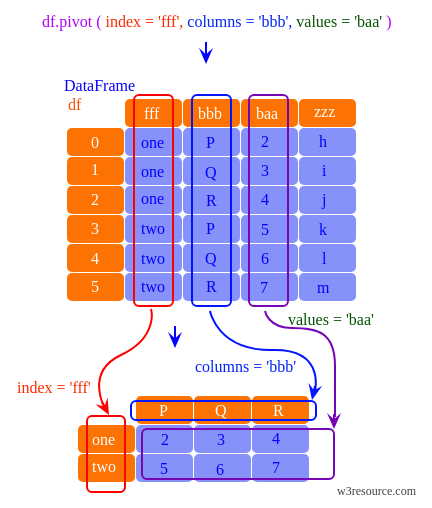

In [ ]:
sales = pd.read_csv('salesmen.csv',parse_dates=['Date'])
sales['Salesman'] = sales["Salesman"].astype("category")
sales.head(3)

,Date,Salesman,Revenue
0,2016-01-01,Bob,7172
1,2016-01-02,Bob,6362
2,2016-01-03,Bob,5982


In [ ]:
ss = sales.pivot(index="Date",columns="Salesman",values="Revenue")

In [ ]:
len(ss.index)

366

In [ ]:
type(ss)

pandas.core.frame.DataFrame

# The Pivot Table Method

In [ ]:
foods = pd.read_csv('foods.csv')
foods.head(3)

,First Name,Gender,City,Frequency,Item,Spend
0,Wanda,Female,Stamford,Weekly,Burger,15.66
1,Eric,Male,Stamford,Daily,Chalupa,10.56
2,Charles,Male,New York,Never,Sushi,42.14


In [ ]:
foods.pivot_table(index=['Gender','Item'],columns=["Frequency","City"],values='Spend',aggfunc="sum")

Frequency           Daily                        ...   Yearly                      
City             New York Philadelphia Stamford  ... New York Philadelphia Stamford
Gender Item                                      ...                               
Female Burger      262.67       231.68   144.66  ...   259.30       123.17   307.03
       Burrito     224.45       321.57   195.63  ...    71.26       116.75   172.98
       Chalupa      43.19        23.49    95.70  ...   157.82       504.44   348.16
       Donut       478.10       247.40   124.35  ...    62.95       175.23   224.48
       Ice Cream   262.19       177.69    92.88  ...   151.67       159.86    15.24
       Sushi        81.07       348.53   393.27  ...   232.41       145.85   362.74
Male   Burger      319.46       112.70   197.72  ...    49.61       197.36   225.07
       Burrito     236.21       165.76   276.23  ...   220.70       118.51   262.64
       Chalupa      54.09       274.81   192.64  ...   167.74        68.81   116.19
       Donut       230.00       190.71   129.42  ...   143.10        44.61    16.52
       Ice Cream   178.22       148.69    15.17  ...   159.70       239.94    96.32
       Sushi       225.57       280.93      NaN  ...   119.44        33.80    48.71

[12 rows x 24 columns]

In [ ]:
foods.pivot_table(index=['Gender','Item'],columns="City",values='Spend',aggfunc="max")

City              New York  Philadelphia  Stamford
Gender Item                                       
Female Burger        98.96         97.79     85.06
       Burrito       92.25         96.79     99.21
       Chalupa       98.43         99.29     98.78
       Donut         95.63         96.52     91.75
       Ice Cream     97.83         88.14     97.44
       Sushi         99.51         99.02     95.43
Male   Burger        90.32         99.68     97.20
       Burrito       98.04         93.27     95.07
       Chalupa       96.44         98.40     99.87
       Donut         86.70         93.12     99.26
       Ice Cream     97.65         99.24     99.17
       Sushi         93.85         97.12     98.48

# The Melt Method

In [ ]:
sales = pd.read_csv('quarters.csv')
sales.head(3)

,Salesman,Q1,Q2,Q3,Q4
0,Boris,602908,233879,354479,32704
1,Bob,43790,514863,297151,544493
2,Tommy,392668,113579,430882,247231


In [ ]:
pd.melt(sales,id_vars="Salesman",var_name="Quarter",value_name="Revenue")

,Salesman,Quarter,Revenue
0,Boris,Q1,602908
1,Bob,Q1,43790
2,Tommy,Q1,392668
3,Travis,Q1,834663
4,Donald,Q1,580935
5,Ted,Q1,656644
6,Jeb,Q1,486141
7,Stacy,Q1,479662
8,Morgan,Q1,992673
9,Boris,Q2,233879
